In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import re

#requests.get()으로 url정보 받아오기.
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

#선수의 정보를 담는 리스트
player_list = []
    
for i in range(1,21):
    url = f"https://www.transfermarkt.com/spieler-statistik/wertvollstespieler/marktwertetop?ajax=yw1&page={i}"
    
    # 웹페이지 요청
    r = requests.get(url, headers = headers)
    r.status_code
    #BeautifulSoup()로 웹페이지 분석 준비
    soup = BeautifulSoup(r.text, 'html.parser')
    
    player_info = soup.find_all('tr', class_=['odd', 'even'])
    
    #player_info에서 'td'태그만 모두 찾기
    for info in player_info:
        player = info.find_all("td")
        
        number = player[0].text
        name = player[3].text
        position = player[4].text
        age = player[5].text
        nation = player[6].img['alt']
        team = player[7].img['alt']
        value = player[8].text.strip()
    
        player_list.append([number, name, position, age, nation, team, value])
        
    time.sleep(1)

In [2]:
df = pd.DataFrame(player_list, columns = ['number', 'name', 'position', 'age', 'nation', 'team', 'value'])
df

,number,name,position,age,nation,team,value
0,1,Jude Bellingham,Attacking Midfield,21,England,Real Madrid,€180.00m
1,2,Erling Haaland,Centre-Forward,24,Norway,Manchester City,€180.00m
2,3,Vinicius Junior,Left Winger,24,Brazil,Real Madrid,€180.00m
3,4,Kylian Mbappé,Centre-Forward,25,France,Real Madrid,€180.00m
4,5,Phil Foden,Right Winger,24,England,Manchester City,€150.00m
...,...,...,...,...,...,...,...
495,496,Marcin Bulka,Goalkeeper,24,Poland,OGC Nice,€20.00m
496,497,Djordje Petrovic,Goalkeeper,24,Serbia,Chelsea FC,€20.00m
497,498,Angelo Stiller,Defensive Midfield,23,Germany,VfB Stuttgart,€20.00m
498,499,Martin Terrier,Left Winger,27,France,Bayer 04 Leverkusen,€20.00m


In [3]:
# 데이터 기본 확인
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   number    500 non-null    object
 1   name      500 non-null    object
 2   position  500 non-null    object
 3   age       500 non-null    object
 4   nation    500 non-null    object
 5   team      500 non-null    object
 6   value     500 non-null    object
dtypes: object(7)
memory usage: 27.5+ KB
None


In [4]:
# age 열을 정수형으로 변환
df['age'] = df['age'].astype(int)

# value 열을 수치형으로 변환 (예: €20.00m -> 20000000)
def convert_value(value):
    value = value.replace('€', '').replace('m', 'e6').replace('k', 'e3')
    return pd.to_numeric(value, errors='coerce')

df['value'] = df['value'].apply(convert_value)

In [5]:
print(df.head())
print(df.info())
print(df.describe())

  number             name            position  age   nation             team  \
0      1  Jude Bellingham  Attacking Midfield   21  England      Real Madrid   
1      2   Erling Haaland      Centre-Forward   24   Norway  Manchester City   
2      3  Vinicius Junior         Left Winger   24   Brazil      Real Madrid   
3      4    Kylian Mbappé      Centre-Forward   25   France      Real Madrid   
4      5       Phil Foden        Right Winger   24  England  Manchester City   

         value  
0  180000000.0  
1  180000000.0  
2  180000000.0  
3  180000000.0  
4  150000000.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   number    500 non-null    object 
 1   name      500 non-null    object 
 2   position  500 non-null    object 
 3   age       500 non-null    int64  
 4   nation    500 non-null    object 
 5   team      500 non-null    object 
 

### 나이와 시장가치의 상관관계

            age     value
age    1.000000 -0.038302
value -0.038302  1.000000


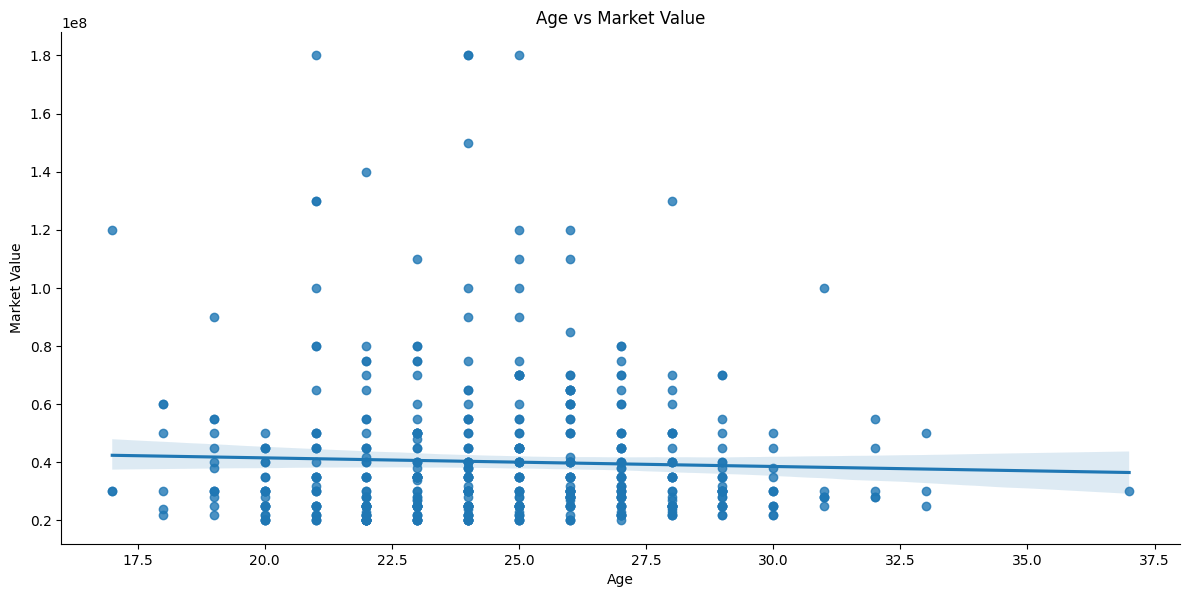

In [6]:
# 나이와 시장가치의 상관분석
correlation = df[['age', 'value']].corr()
print(correlation)

# 나이와 시장가치의 산점도 및 회귀선 시각화
sns.lmplot(x='age', y='value', data=df, aspect=2, height=6)
plt.title('Age vs Market Value')
plt.xlabel('Age')
plt.ylabel('Market Value')
plt.show()

# 나이와 시장가치 간에 뚜렷한 상관 관계가 없음

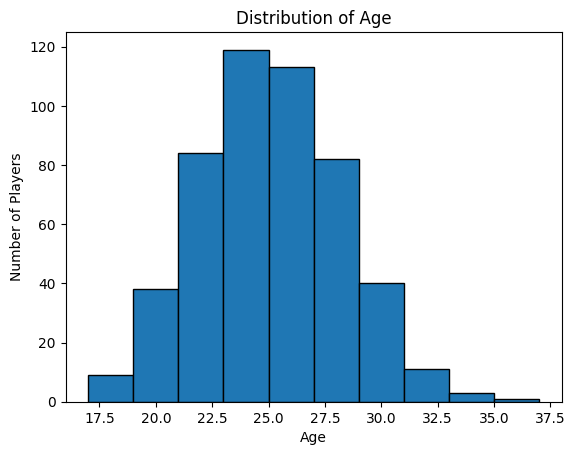

In [7]:
# 나이 분포
plt.hist(df['age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.title('Distribution of Age')
plt.show()

#20대의 선수가 많이 분포되어있음

### 포지션과 시장가치

                    count          mean           std         min         25%  \
position                                                                        
Attacking Midfield   48.0  4.754167e+07  3.329747e+07  20000000.0  25000000.0   
Central Midfield     69.0  3.915942e+07  2.118728e+07  20000000.0  25000000.0   
Centre-Back          91.0  3.703297e+07  1.407081e+07  20000000.0  25000000.0   
Centre-Forward       70.0  4.464286e+07  3.135493e+07  20000000.0  25000000.0   
Defensive Midfield   44.0  3.970455e+07  2.529508e+07  20000000.0  25000000.0   
Goalkeeper           24.0  3.020833e+07  7.581322e+06  20000000.0  25000000.0   
Left Midfield         2.0  2.100000e+07  1.414214e+06  20000000.0  20500000.0   
Left Winger          44.0  4.350000e+07  2.772833e+07  20000000.0  28000000.0   
Left-Back            29.0  3.527586e+07  1.308733e+07  20000000.0  25000000.0   
Right Midfield        1.0  2.400000e+07           NaN  24000000.0  24000000.0   
Right Winger         47.0  4

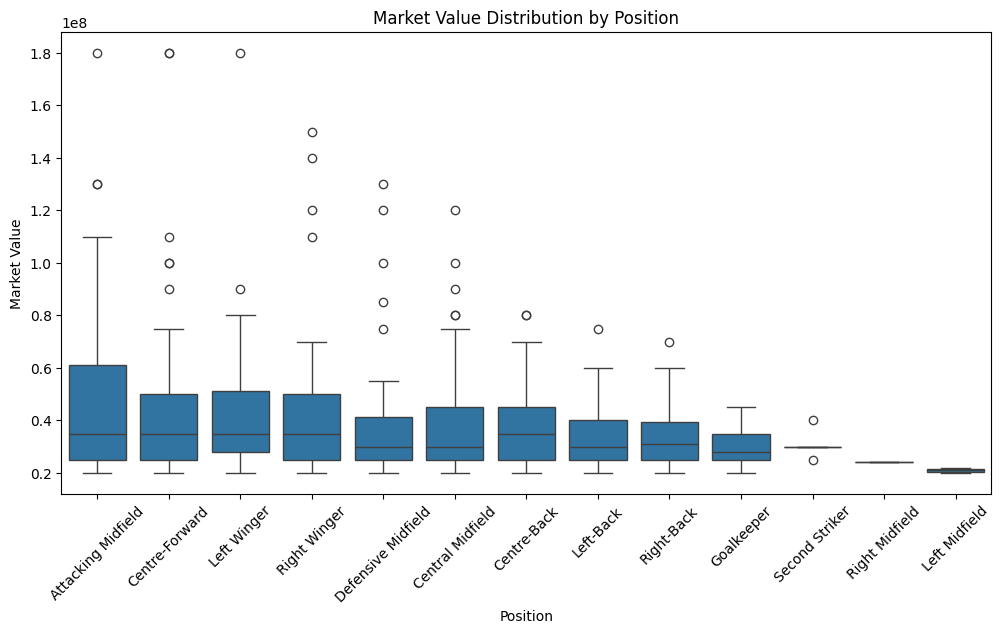

In [8]:
# 포지션별 기술통계
position_stats = df.groupby('position')['value'].describe()
print(position_stats)

# 포지션별 시장가치 분포 시각화
plt.figure(figsize=(12, 6))
sns.boxplot(x='position', y='value', data=df)
plt.title('Market Value Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Market Value')
plt.xticks(rotation=45)
plt.show()

In [9]:
#포지션별 탑 500안에 들어가는 선수의 수
position_counts = df['position'].value_counts()
print(position_counts)

#상대적으로 공격수의 포지션이 더 높은 가치를 지님.(수비수나 수비형미드필더는 저평가)

position
Centre-Back           91
Centre-Forward        70
Central Midfield      69
Attacking Midfield    48
Right Winger          47
Left Winger           44
Defensive Midfield    44
Left-Back             29
Right-Back            26
Goalkeeper            24
Second Striker         5
Left Midfield          2
Right Midfield         1
Name: count, dtype: int64


### 국가와 시장가치

                    count          mean           std         min         25%  \
nation                                                                          
Albania               1.0  2.200000e+07           NaN  22000000.0  22000000.0   
Algeria               3.0  3.000000e+07  5.000000e+06  25000000.0  27500000.0   
Argentina            20.0  4.410000e+07  2.564310e+07  20000000.0  26500000.0   
Armenia               1.0  2.000000e+07           NaN  20000000.0  20000000.0   
Austria               3.0  2.766667e+07  2.516611e+06  25000000.0  26500000.0   
Belgium              12.0  4.016667e+07  1.358364e+07  25000000.0  29500000.0   
Bosnia-Herzegovina    2.0  2.400000e+07  5.656854e+06  20000000.0  22000000.0   
Brazil               47.0  4.268085e+07  2.839635e+07  20000000.0  25000000.0   
Burkina Faso          2.0  3.250000e+07  1.767767e+07  20000000.0  26250000.0   
Cameroon              4.0  3.100000e+07  8.041559e+06  22000000.0  25750000.0   
Canada                2.0  5

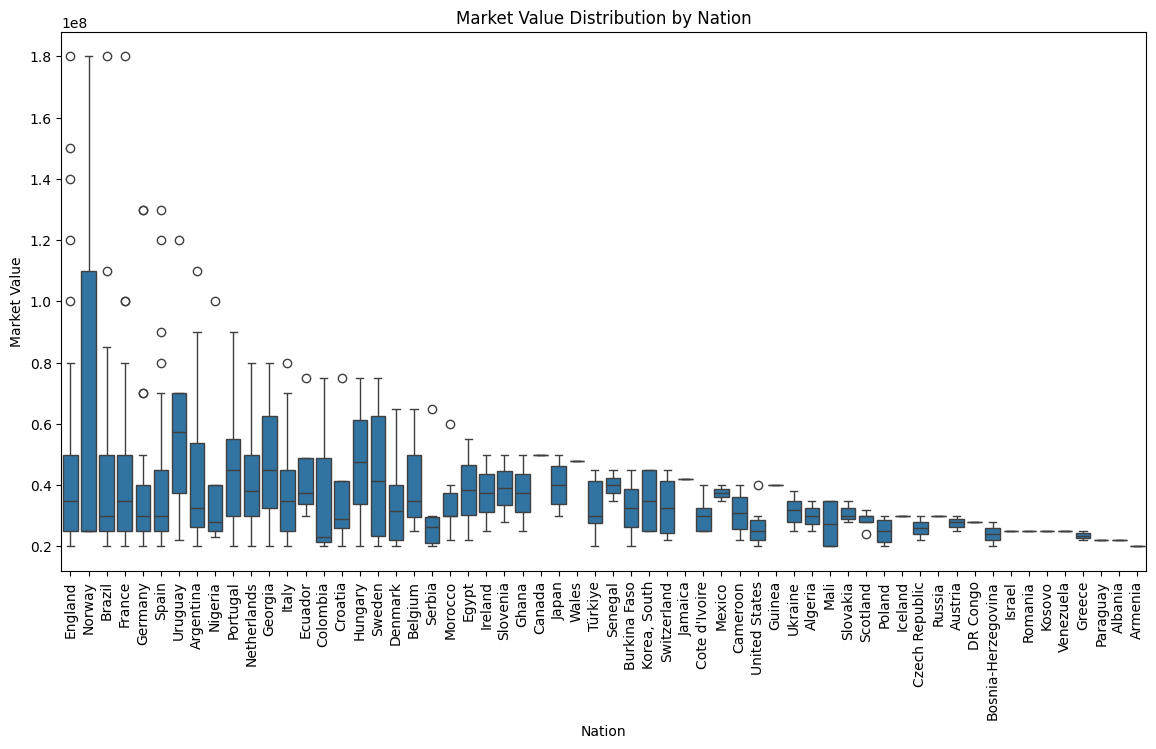

In [16]:
# 국가별 기술통계
nation_stats = df.groupby('nation')['value'].describe()
print(nation_stats)

# 국가별 시장가치 시각화
plt.figure(figsize=(14, 7))
sns.boxplot(x='nation', y='value', data=df)
plt.title('Market Value Distribution by Nation')
plt.xlabel('Nation')
plt.ylabel('Market Value')
plt.xticks(rotation=90)
plt.show()

/var/folders/gy/ylcsy3wj18b_80z186rb1dcw0000gn/T/ipykernel_15484/2781042797.py:6: FutureWarning: The provided callable <function mean at 0x108579a80> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  sns.heatmap(top_nation_values.pivot_table(index='nation', values='value', aggfunc=np.mean).sort_values(by='value', ascending=False), annot=True, fmt='.1f')


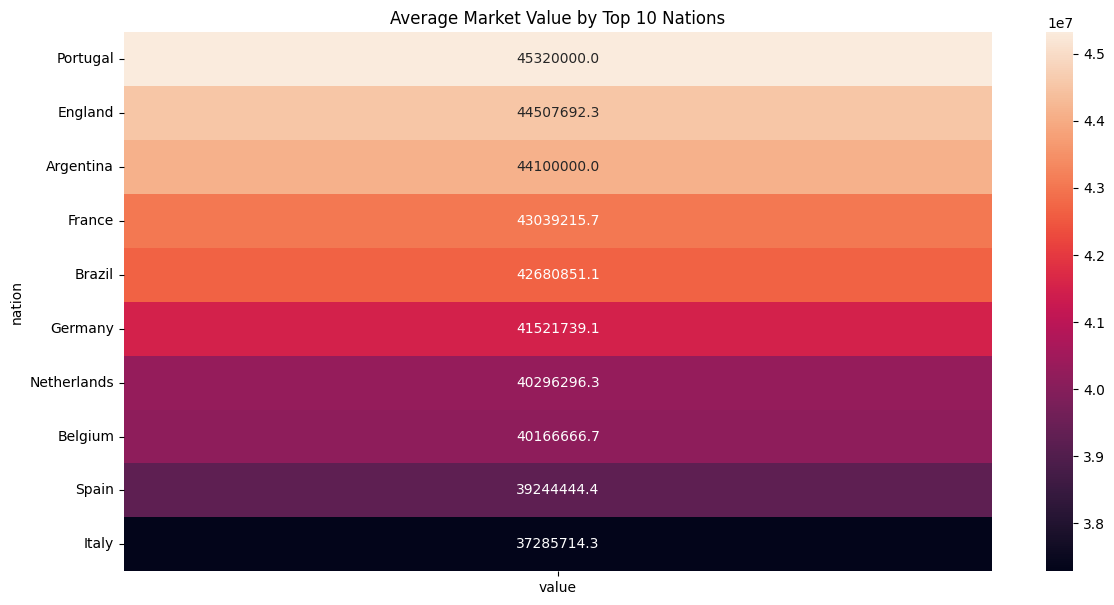

In [18]:
# 상위 10개 국가에 대한 히트맵
top_nations = df['nation'].value_counts().index[:10]
top_nation_values = df[df['nation'].isin(top_nations)]

plt.figure(figsize=(14, 7))
sns.heatmap(top_nation_values.pivot_table(index='nation', values='value', aggfunc=np.mean).sort_values(by='value', ascending=False), annot=True, fmt='.1f')
plt.title('Average Market Value by Top 10 Nations')
plt.show()

### 팀과 시장가치

                         count          mean           std         min  \
team                                                                     
1.FSV Mainz 05             1.0  2.000000e+07           NaN  20000000.0   
AC Milan                  11.0  3.818182e+07  2.059523e+07  20000000.0   
ACF Fiorentina             3.0  2.733333e+07  6.806859e+06  22000000.0   
AFC Bournemouth            7.0  2.514286e+07  7.819390e+06  20000000.0   
AS Monaco                  7.0  2.642857e+07  3.779645e+06  20000000.0   
...                        ...           ...           ...         ...   
Villarreal CF              3.0  3.166667e+07  7.637626e+06  25000000.0   
West Ham United           10.0  3.760000e+07  1.317574e+07  24000000.0   
Without Club               2.0  3.000000e+07  7.071068e+06  25000000.0   
Wolverhampton Wanderers    7.0  3.428571e+07  1.239239e+07  20000000.0   
Zenit St. Petersburg       1.0  2.000000e+07           NaN  20000000.0   

                                25%  

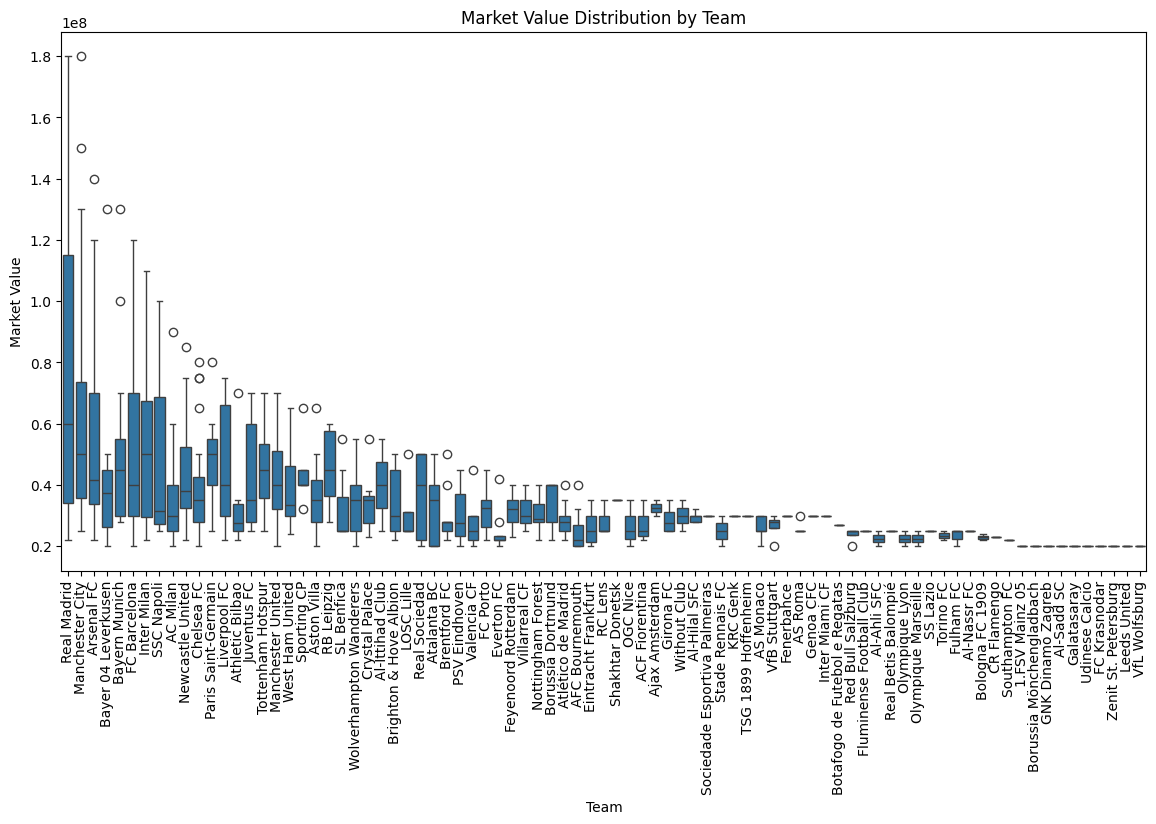

In [13]:
# 팀별 기술통계
team_stats = df.groupby('team')['value'].describe()
print(team_stats)

# 팀별 시장가치 시각화
plt.figure(figsize=(14, 7))
sns.boxplot(x='team', y='value', data=df)
plt.title('Market Value Distribution by Team')
plt.xlabel('Team')
plt.ylabel('Market Value')
plt.xticks(rotation=90)
plt.show()


/var/folders/gy/ylcsy3wj18b_80z186rb1dcw0000gn/T/ipykernel_15484/3785609863.py:2: FutureWarning: The provided callable <function mean at 0x108579a80> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  team_values_pivot = df.pivot_table(index='team', values='value', aggfunc=np.mean)


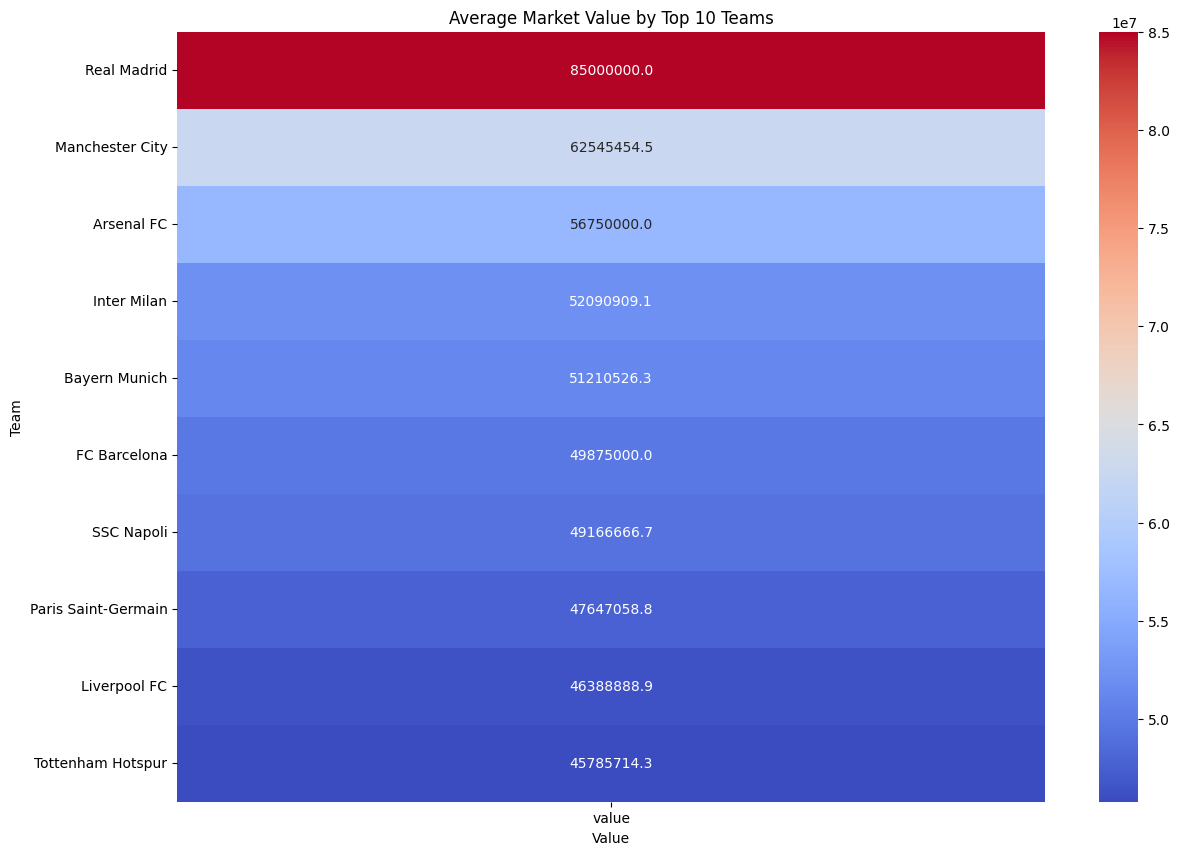

In [25]:
# 모든 팀에 대해 피벗 테이블을 생성
team_values_pivot = df.pivot_table(index='team', values='value', aggfunc=np.mean)

# 히트맵을 그리기 위해 팀별 평균 시장 가치를 정렬
sorted_team_values = team_values_pivot.sort_values(by='value', ascending=False)

# 상위 10개 팀만 선택
top_10_teams = sorted_team_values.head(10)

plt.figure(figsize=(14, 10))
sns.heatmap(top_10_teams, annot=True, fmt='.1f', cmap='coolwarm')
plt.title('Average Market Value by Top 10 Teams')
plt.xlabel('Value')
plt.ylabel('Team')
plt.show()